<a href="https://colab.research.google.com/github/AmbarM2609/Stock_Market_Analysis/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download jacksoncrow/stock-market-dataset

Dataset URL: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset
License(s): CC0-1.0
 99% 515M/522M [00:12<00:00, 65.7MB/s]
100% 522M/522M [00:12<00:00, 44.3MB/s]


In [4]:
! unzip /content/stock-market-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: stocks/CAPE.csv         
  inflating: stocks/CAPL.csv         
  inflating: stocks/CAPR.csv         
  inflating: stocks/CAR.csv          
  inflating: stocks/CARA.csv         
  inflating: stocks/CARE.csv         
  inflating: stocks/CARG.csv         
  inflating: stocks/CARO.csv         
  inflating: stocks/CARR#.csv        
  inflating: stocks/CARS.csv         
  inflating: stocks/CARV.csv         
  inflating: stocks/CASA.csv         
  inflating: stocks/CASH.csv         
  inflating: stocks/CASI.csv         
  inflating: stocks/CASS.csv         
  inflating: stocks/CASY.csv         
  inflating: stocks/CAT.csv          
  inflating: stocks/CATB.csv         
  inflating: stocks/CATC.csv         
  inflating: stocks/CATM.csv         
  inflating: stocks/CATO.csv         
  inflating: stocks/CATS.csv         
  inflating: stocks/CATY.csv         
  inflating: stocks/CB.csv           
  inflating: stocks/CBAN.csv         

In [11]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/stocks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/stocks/MYI.csv
/content/stocks/TDACU.csv
/content/stocks/BRN.csv
/content/stocks/JRO.csv
/content/stocks/ASND.csv
/content/stocks/MPC.csv
/content/stocks/MHI.csv
/content/stocks/MIDD.csv
/content/stocks/FICO.csv
/content/stocks/NRBO.csv
/content/stocks/AHPI.csv
/content/stocks/OPINI.csv
/content/stocks/GDOT.csv
/content/stocks/USFD.csv
/content/stocks/ICLK.csv
/content/stocks/KRA.csv
/content/stocks/SCYX.csv
/content/stocks/RCP.csv
/content/stocks/VCEL.csv
/content/stocks/RDIB.csv
/content/stocks/JCS.csv
/content/stocks/GDV.csv
/content/stocks/NBIX.csv
/content/stocks/CALX.csv
/content/stocks/SRRA.csv
/content/stocks/TRTN.csv
/content/stocks/SNN.csv
/content/stocks/NVT.csv
/content/stocks/IFRX.csv
/content/stocks/NXP.csv
/content/stocks/AGM-A.csv
/content/stocks/GKOS.csv
/content/stocks/NKE.csv
/content/stocks/JEQ.csv
/content/stocks/WLKP.csv
/content/stocks/ASNA.csv
/content/stocks/TSCAP.csv
/content/stocks/CFFA.csv
/content/

# Import the file.

In [17]:
df = pd.read_csv('/content/stocks/SPG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-12-14,20.883219,20.883219,20.651182,20.883219,4.881142,7717200
1,1993-12-15,20.883219,20.883219,20.651182,20.883219,4.881142,1833700
2,1993-12-16,20.883219,20.999237,20.767200,20.883219,4.881142,624500
3,1993-12-17,20.883219,20.883219,20.767200,20.767200,4.854022,490500
4,1993-12-20,20.767200,20.883219,20.767200,20.883219,4.881142,546000
...,...,...,...,...,...,...,...
6617,2020-03-26,62.689999,65.489998,58.400002,62.099998,62.099998,8730100
6618,2020-03-27,60.419998,60.459999,55.700001,58.169998,58.169998,4837800
6619,2020-03-30,57.570000,58.000000,54.810001,56.270000,56.270000,4848900
6620,2020-03-31,56.610001,57.320000,52.799999,54.860001,54.860001,6507700


In [18]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1993-12-14,1993-12-14,20.883219,20.883219,20.651182,20.883219,4.881142,7717200
1993-12-15,1993-12-15,20.883219,20.883219,20.651182,20.883219,4.881142,1833700
1993-12-16,1993-12-16,20.883219,20.999237,20.767200,20.883219,4.881142,624500
1993-12-17,1993-12-17,20.883219,20.883219,20.767200,20.767200,4.854022,490500
1993-12-20,1993-12-20,20.767200,20.883219,20.767200,20.883219,4.881142,546000
...,...,...,...,...,...,...,...
2020-03-26,2020-03-26,62.689999,65.489998,58.400002,62.099998,62.099998,8730100
2020-03-27,2020-03-27,60.419998,60.459999,55.700001,58.169998,58.169998,4837800
2020-03-30,2020-03-30,57.570000,58.000000,54.810001,56.270000,56.270000,4848900


# Using the Average

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

## Splitting the data

### NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set

#### Additional: It would be interesting to see if we train it with more values!

In [ ]:
# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of training set:
(987, 2)

 Shape of validation set:
(5856, 2)


## Predictions 🔮

In [ ]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-5856+i:].sum() + sum(preds) # note: 5856 taken from shape of validation set
    b = a/5856
    preds.append(b)

## checking the results (RMSE value)

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
150.60563767075078


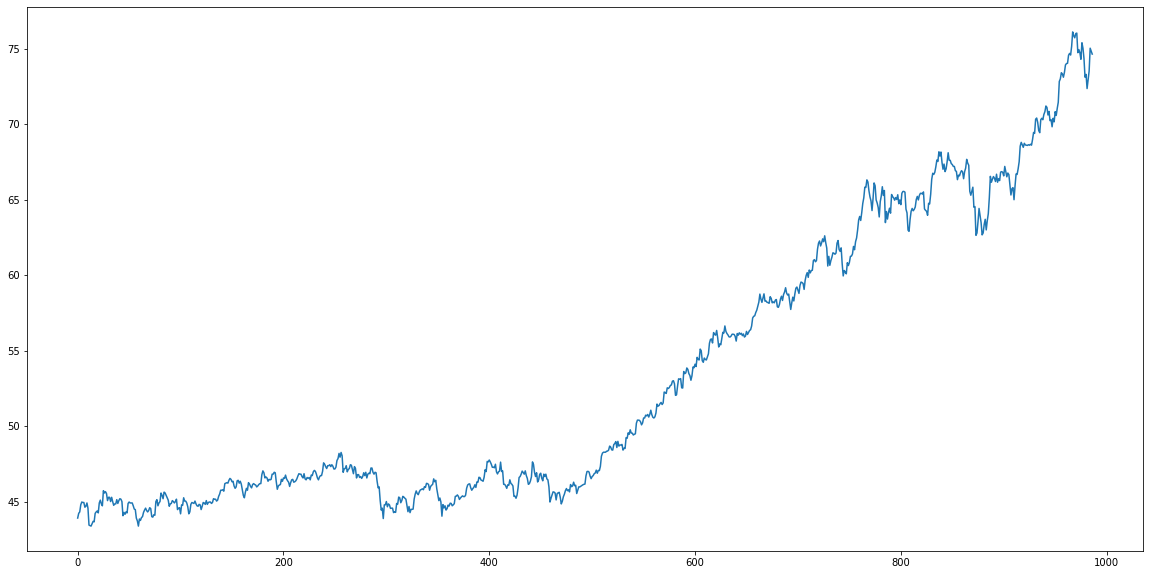

In [ ]:
# Here's our the actual stock price
plt.plot(train['Close'])

## plot the graph

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


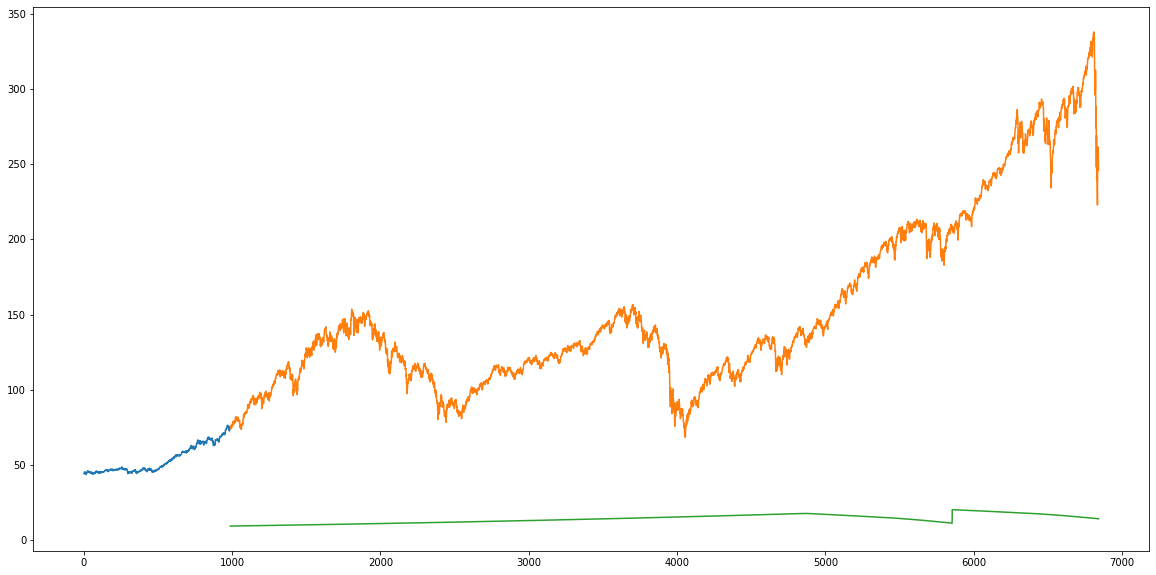

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# Linear Regression

## sort the dataset in ascending order and create new dataset

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset so that any new feature created does not affect the original data
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

## Create features
Hypothesis is that the first and last days of the week could potentially affect the closing price of the stock far more than the other days.  So we have created a feature that identifies whether a given day is Monday/Friday or Tuesday/Wednesday/Thursday.

In [ ]:
new_data['mon_fri'] = 0

for i in range(0,len(new_data)):
    temp = pd.Timestamp(new_data['Date'][i])
    if (temp.dayofweek == 0 or temp.dayofweek == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Split the data

In [ ]:
import datetime as dt

#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_train['Date'] = pd.to_datetime(x_train['Date'])
x_train['Date']=x_train['Date'].map(dt.datetime.toordinal)

x_valid = valid.drop('Close', axis=1)

x_valid['Date'] = pd.to_datetime(x_valid['Date'])
x_valid['Date']=x_valid['Date'].map(dt.datetime.toordinal)

y_valid = valid['Close']

## Linear Regression

In [ ]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Predict

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

35.42005401778599

## Plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


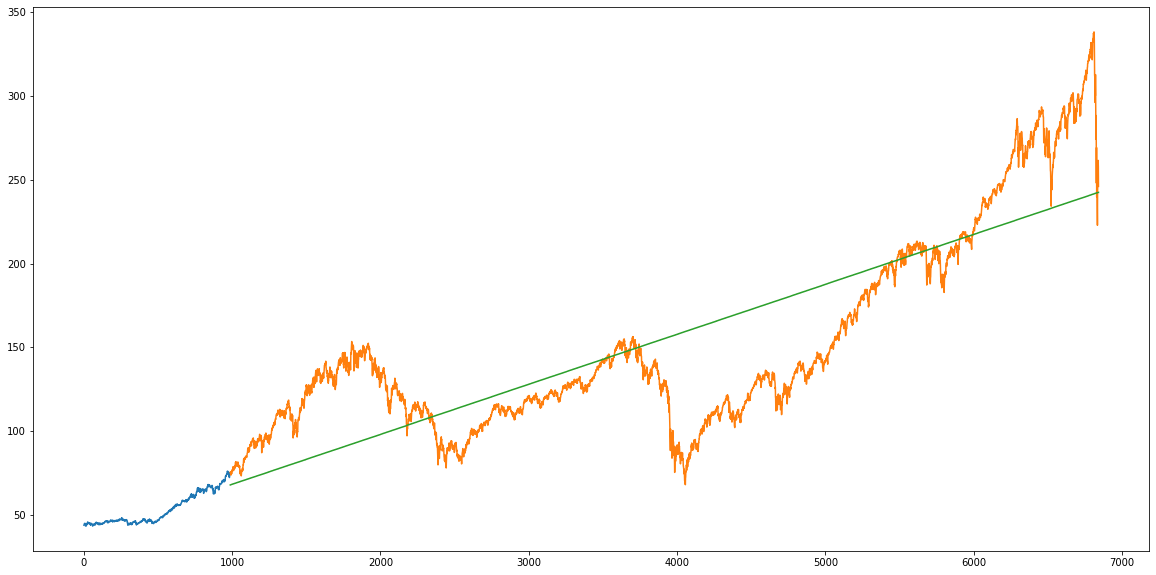

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# KNN

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

## scale data

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

## using gridsearch to find the best parameter

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

## fit the model and make predictions

In [ ]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)

## results

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

111.96831841263449

## plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


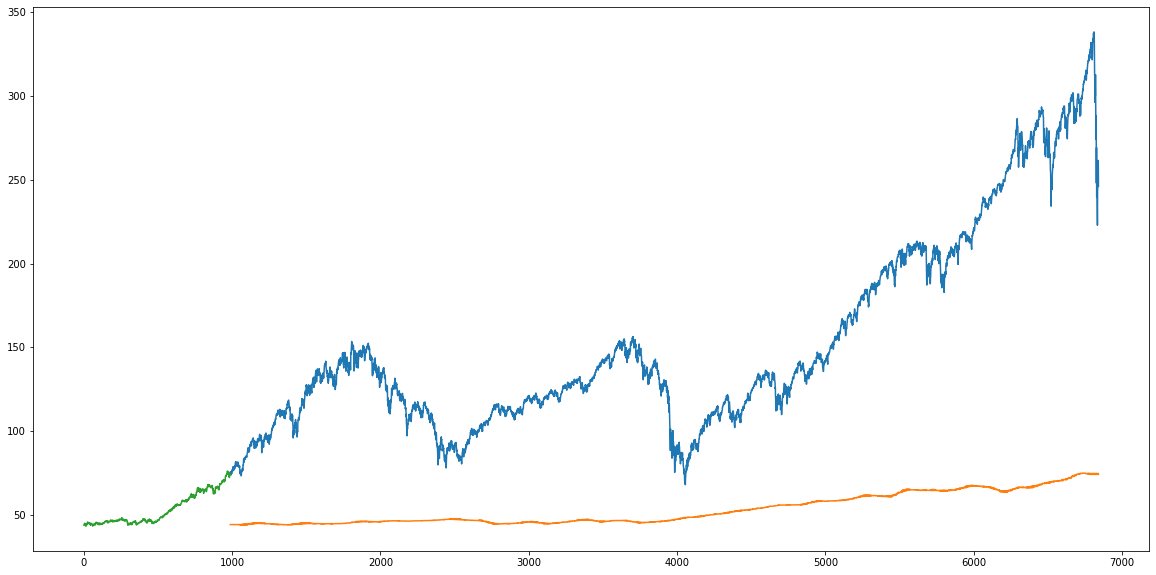

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

# Auto ARIMA

In [ ]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pmdarima'

## LSTM

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

927/927 - 23s - loss: 3.5688e-05


## error

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.286370240210537

## plotting

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


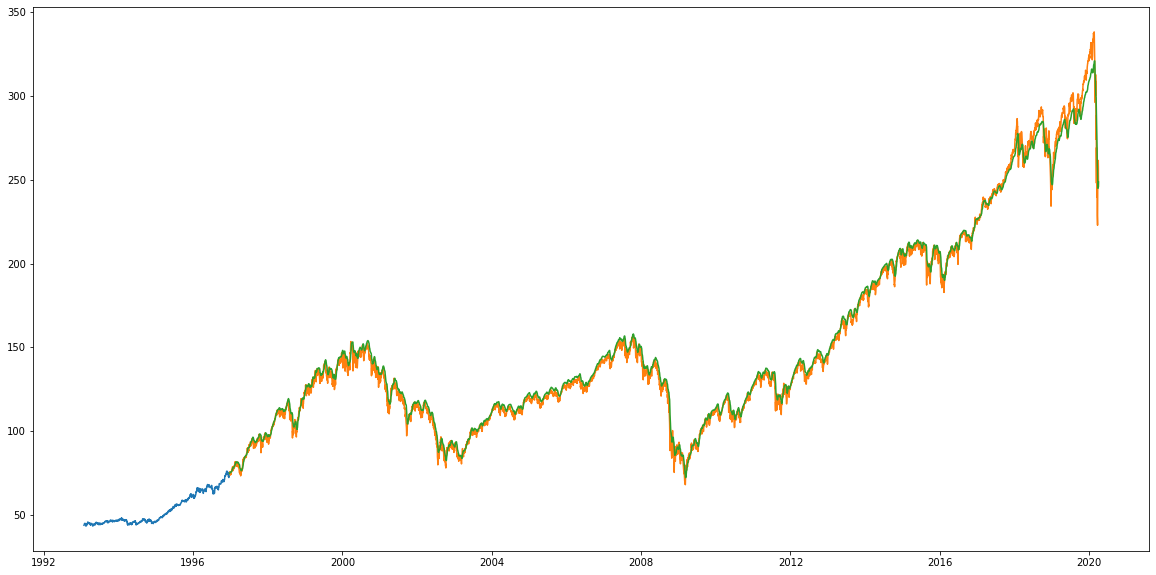

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])